### Basic Training and Evaluating Classifier

In [ ]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

DRIVE_PATH="/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

DATASET_PATH="datasets/iris"
DATASET_FILE="iris.data"

column_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]

path = os.path.join(DRIVE_PATH, DATASET_PATH)
path = os.path.join(path, DATASET_FILE)
ds = pd.read_csv(path, names=column_names)
ds = ds[~ds['class'].str.contains("setosa")] # Takes out a class of iris flower so we can do binary classification

In [ ]:
ds.head()
ds.iloc[:, -1:]

,class
50,Iris-versicolor
51,Iris-versicolor
52,Iris-versicolor
53,Iris-versicolor
54,Iris-versicolor
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
TEST_RATIO=0.2
TRAIN_RATIO=1.0-TEST_RATIO

np.random.seed(42)

m_ds = len(ds) # length of dataset (100)
m_train = int(TRAIN_RATIO*m_ds) # number of training instances (80)
m_test = m_ds - m_train # number of test instances (20)
idxs_random = np.random.permutation(m_ds) # Generates 100 random permutation numbers based on seed 42
idxs_train = idxs_random[:m_train]
idxs_test = idxs_random[m_train:]

ds_train = ds.iloc[idxs_train] # Gets train data from dataset
ds_test = ds.iloc[idxs_test] # Gets test data from dataset

print('num input instances: ', m_ds);
print('num train instances: ', m_train);
print('num test instances: ', m_test);

ds_train.head()

num input instances:  100
num train instances:  80
num test instances:  20


,sepal length,sepal width,petal length,petal width,class
133,6.3,2.8,5.1,1.5,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor


In [ ]:
ds_test.head()

,sepal length,sepal width,petal length,petal width,class
113,5.7,2.5,5.0,2.0,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica
87,6.3,2.3,4.4,1.3,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [ ]:
xs_train = ds_train.iloc[:, [0,1,2,3]] # Gets first 4 indexed columns. Does not include class
y_train = ds_train.iloc[:,[4]] # Gets last column; i.e. class column
y_train.head()

MAX_DEPTH = 3

from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(
    max_depth=MAX_DEPTH,
    criterion="entropy"
)
model_tree.fit(xs_train, y_train)
y_train.head()

,class
133,Iris-virginica
103,Iris-virginica
120,Iris-virginica
95,Iris-versicolor
94,Iris-versicolor


In [ ]:
y_train_predicted = model_tree.predict(xs_train) # Predicted values based on info from first four columns
y_train_np = y_train.to_numpy()[:,0] # put into numpy array
y_train_equal = (y_train_predicted == y_train_np) # Checks if values from prediction equal train values
accuracy_train = np.sum(y_train_equal) / y_train_np.shape[0]
print('train accuracy: ', accuracy_train)

xs_test = ds_test.iloc[:, [0,1,2,3]]
y_test = ds_test.iloc[:,[4]]

y_test_predicted = model_tree.predict(xs_test) # Same as above, just for the test data
y_test_np = y_test.to_numpy()[:,0]
y_test_equal = (y_test_predicted == y_test_np)
print(y_test_equal)
accuracy_test = np.sum(y_test_equal) / y_test_np.shape[0]
print('test accuracy: ', accuracy_test)

train accuracy:  0.9875
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True]
test accuracy:  0.95


In [ ]:
def calc_confusion_matrix(true_labels, predicted_labels):
    classes = np.unique(true_labels) # Get different possible classes, in this case 2
    num_classes = len(classes)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int) # Initialize confusion matrix

    for i in range(len(true_labels)):
        true_label_index = np.where(classes == true_labels[i])[0][0] # Compare class to true_label, get 0 or 1
        predicted_label_index = np.where(classes == predicted_labels[i])[0][0] # Compare class to predicted label
        confusion_matrix[true_label_index][predicted_label_index] += 1

    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                true_negatives = np.sum((true_labels != classes[i]) & (predicted_labels != classes[j]))
                confusion_matrix[i, j] = true_negatives

    return confusion_matrix

def get_accuracy(confusion_matrix):
  true_positive = confusion_matrix[0][0]
  true_negative = confusion_matrix[1][1]
  instances = np.sum(confusion_matrix)
  return float("%.3f" % ((true_positive + true_negative) / instances))

def get_precision(confusion_matrix):
  true_positive = confusion_matrix[0][0]
  false_positive = confusion_matrix[1][0]
  return float("%.3f" % (true_positive / (true_positive + false_positive)))

def get_recall(confusion_matrix):
  true_positive = confusion_matrix[0][0]
  false_negative = confusion_matrix[0][1]
  return float("%.3f" % (true_positive / (true_positive + false_negative)))

def get_f1_score(confusion_matrix):
  true_positive = confusion_matrix[0][0]
  false_negative = confusion_matrix[0][1]
  false_positive = confusion_matrix[1][0]
  return float("%.3f" % ((2 * true_positive) / (2 * true_positive + false_negative + false_positive)))

confusion_matrix_train = calc_confusion_matrix(y_train.to_numpy().flatten(), y_train_predicted)
print('Confusion Matrix (Training Set):')
print(confusion_matrix_train)

train_acc = get_accuracy(confusion_matrix_train)
train_precision = get_precision(confusion_matrix_train)
train_recall = get_recall(confusion_matrix_train)
train_f1_score = get_f1_score(confusion_matrix_train)

print('Training accuracy: ', train_acc)
print('Training precision: ', train_precision)
print('Training recall: ', train_recall)
print('Training F1 Score: ', train_f1_score)


confusion_matrix_test = calc_confusion_matrix(y_test.to_numpy().flatten(), y_test_predicted)
print('Confusion Matrix (Testing Set):')
print(confusion_matrix_test)

test_acc = get_accuracy(confusion_matrix_test)
test_precision = get_precision(confusion_matrix_test)
test_recall = get_recall(confusion_matrix_test)
test_f1_score = get_f1_score(confusion_matrix_test)

print('Test accuracy: ', test_acc)
print('Test precision: ', test_precision)
print('Test recall: ', test_recall)
print('Test F1 Score: ', test_f1_score)


Confusion Matrix (Training Set):
[[42  1]
 [ 0 37]]
Training accuracy:  0.988
Training precision:  1.0
Training recall:  0.977
Training F1 Score:  0.988
Confusion Matrix (Testing Set):
[[ 7  0]
 [ 1 12]]
Test accuracy:  0.95
Test precision:  0.875
Test recall:  1.0
Test F1 Score:  0.933


In [ ]:
from sklearn.model_selection import KFold

X = ds.iloc[:, :-1]
y = ds.iloc[:, -1]

kf = KFold(n_splits=10)

test_accuracies = []
train_accuracies = []
test_precisions = []
train_precisions = []
test_recalls = []
train_recalls = []
test_f1_scores = []
train_f1_scores = []

for i, (train_index, test_index) in enumerate(kf.split(ds)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  dt = DecisionTreeClassifier(
    max_depth=MAX_DEPTH,
    criterion="entropy"
  )
  dt.fit(X_train, y_train)

  y_test_pred = dt.predict(X_test)
  y_train_pred = dt.predict(X_train)
 # test_confusion_matrix = calc_confusion_matrix(y_test.to_numpy().flatten(), y_test_pred)
  train_confusion_matrix = calc_confusion_matrix(y_train.to_numpy().flatten(), y_train_pred)

 # test_accuracies.append(get_accuracy(test_confusion_matrix))
  train_accuracies.append(get_accuracy(train_confusion_matrix))
 # test_precisions.append(get_precision(test_confusion_matrix))
  train_precisions.append(get_precision(train_confusion_matrix))
  #test_recalls.append(get_recall(test_confusion_matrix))
  train_recalls.append(get_recall(train_confusion_matrix))
  #test_f1_scores.append(get_f1_score(test_confusion_matrix))
  train_f1_scores.append(get_f1_score(train_confusion_matrix))

def get_stats(arr):
  length = len(arr)
  temp = arr
  for i in range(length):
    for j in range(length-i-1):
      if (temp[j] > temp[j+1]):
        temp[j], temp[j+1] = temp[j+1], temp[j]

  min = temp[0]
  max = temp[length - 1]
  median = (temp[length // 2 - 1] + temp[length // 2]) / 2

  unique_values = []
  mode_values = []
  for i in arr:
    if i not in unique_values:
      unique_values.append(i)
    else:
      mode_values.append(i)

  mode = mode_values[0]

  total = np.sum(arr)
  mean = total / length
  squareSum = 0
  for entry in arr:
    squareSum += (entry - mean) ** 2

  std_dev = squareSum / length
  std_dev = std_dev ** .5
  print('Min is: ', min)
  print('Max is: ', max)
  print('Median is: ', median)
  print('Mode is: ', mode)
  print('Standard deviation is: ', std_dev)

print('Tree train data over 10 decision trees: ')
print('Accuracy stats: ')
get_stats(train_accuracies)

print('\nPrecision stats: ')
get_stats(train_precisions)

print('\nRecall stats: ')
get_stats(train_recalls)

print('\nF1 score stats: ')
get_stats(train_f1_scores)

Tree train data over 10 decision trees: 
Accuracy stats: 
Min is:  0.967
Max is:  1.0
Median is:  0.989
Mode is:  0.989
Standard deviation is:  0.008520563361656325

Precision stats: 
Min is:  0.94
Max is:  1.0
Median is:  1.0
Mode is:  1.0
Standard deviation is:  0.018714967272212918

Recall stats: 
Min is:  0.976
Max is:  1.0
Median is:  0.98
Mode is:  0.976
Standard deviation is:  0.01088852607105297

F1 score stats: 
Min is:  0.969
Max is:  1.0
Median is:  0.989
Mode is:  0.988
Standard deviation is:  0.008074651695274547


In [ ]:
DRAWING_FILE="tree.dot"

from sklearn.tree import export_graphviz

export_graphviz(
    model_tree,
    out_file=DRAWING_FILE,
)

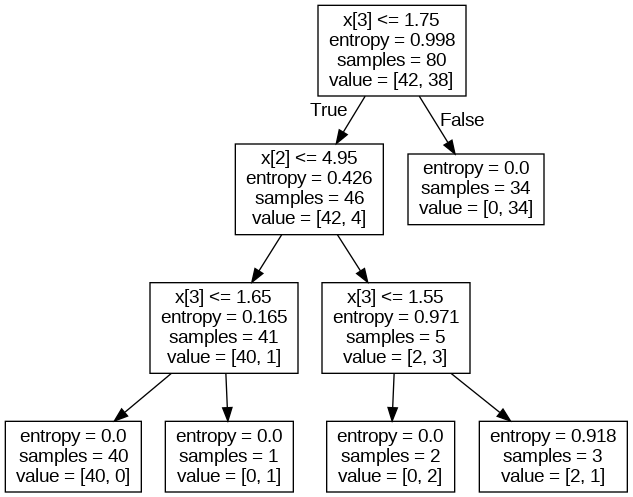

In [ ]:
!apt -qqq install graphviz
!dot -Tpng tree.dot > tree.png
from IPython.display import Image
Image('/content/tree.png')